In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Dataset/diabetics.csv')

In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

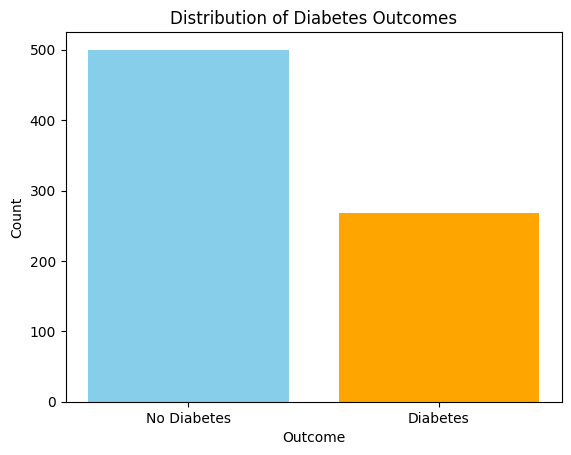

In [13]:
outcome_counts = df['Outcome'].value_counts()

# Plot the distribution of diabetes outcomes
plt.bar(outcome_counts.index, outcome_counts.values, color=['skyblue', 'orange'])
plt.title('Distribution of Diabetes Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(outcome_counts.index, ['No Diabetes', 'Diabetes'])
plt.show()

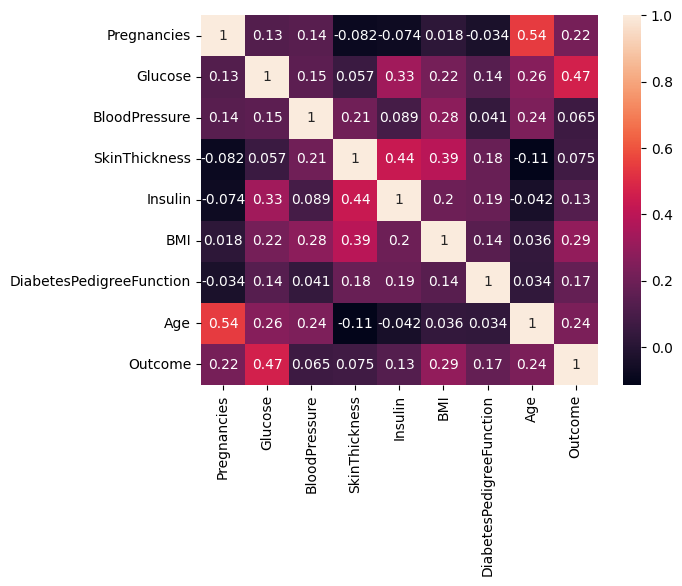

In [15]:
sns.heatmap(df.corr(),annot=True)
plt.show()

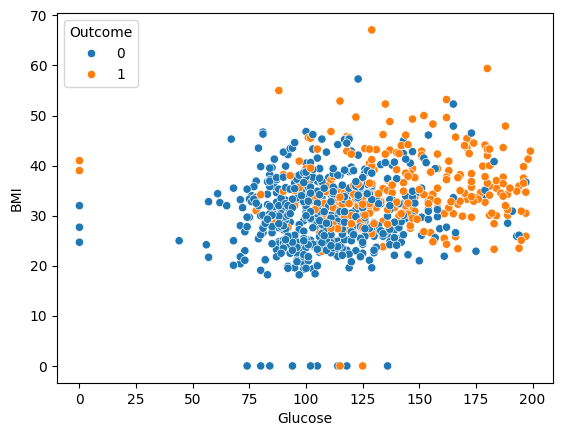

In [14]:
sns.scatterplot(data = df,x = 'Glucose', y = 'BMI',hue = 'Outcome');

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
print("Number of 0's for Glucose:", df['Glucose'].isin([0]).sum())
print("Number of 0's for Blood Pressure:", df['BloodPressure'].isin([0]).sum())
print("Number of 0's for Skin Thickness:", df['SkinThickness'].isin([0]).sum())
print("Number of 0's for Insulin:", df['Insulin'].isin([0]).sum())
print("Number of 0's for BMI:", df['BMI'].isin([0]).sum())

Number of 0's for Glucose: 5
Number of 0's for Blood Pressure: 35
Number of 0's for Skin Thickness: 227
Number of 0's for Insulin: 374
Number of 0's for BMI: 11


## Data Cleaning

In [18]:
diabetes_clean = df.copy()

In [19]:
diabetes_clean['Glucose'] = diabetes_clean['Glucose'].replace(0,df['Glucose'].mean())
diabetes_clean['BloodPressure'] = diabetes_clean['BloodPressure'].replace(0,df['BloodPressure'].mean())
diabetes_clean['SkinThickness'] = diabetes_clean['SkinThickness'].replace(0,df['SkinThickness'].mean())
diabetes_clean['Insulin'] = diabetes_clean['Insulin'].replace(0,df['Insulin'].mean())
diabetes_clean['BMI'] = diabetes_clean['BMI'].replace(0,df['BMI'].mean())

In [20]:
# Changing number of pregancies to a binary variable. 
# Where any pregnancy > 0 is returned a value of 1. 
# Since no pregnancies is already encoded as 0.

diabetes_clean['Pregnancies'].values[diabetes_clean['Pregnancies'] > 0] = 1

In [21]:
diabetes_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


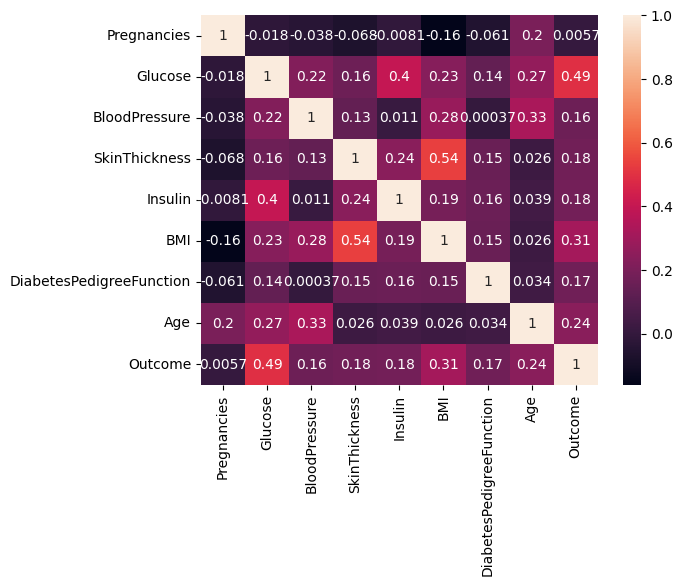

In [22]:
sns.heatmap(diabetes_clean.corr(), annot=True)
plt.show()

## Logistic Regression Model

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.74      0.60      0.67        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



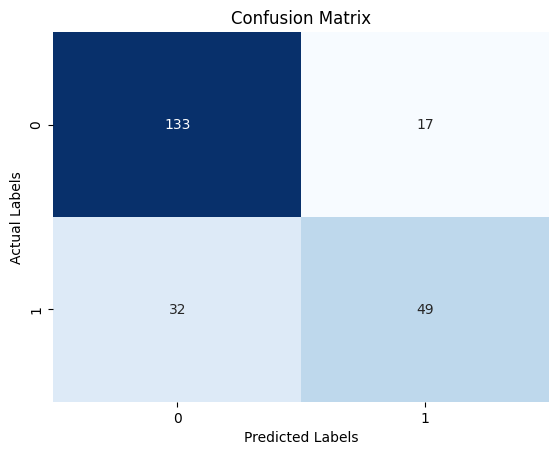

In [36]:
conf_matrix = confusion_matrix(y_test, y_predicted)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [42]:
patient = [[0,120,26,180, 18, 2.1, 30, 1]]
#Pregnancies, BloodPressure, SkinThickness, Glucose, BMI, DiabetesPedigreeFunction, Age, Intercept

y_predicted = model.predict(patient)
y_predicted

array([1], dtype=int64)

In [44]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))